# About this file
The real estate markets, like those in Sydney and Melbourne, present an interesting opportunity for data analysts to analyze and predict where property prices are moving towards. Prediction of property prices is becoming increasingly important and beneficial. Property prices are a good indicator of both the overall market condition and the economic health of a country. Considering the data provided, we are wrangling a large set of property sales records stored in an unknown format and with unknown data quality issues

In [26]:
# import necessary libersry 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score

In [2]:
# load  data sets 
df = pd.read_csv('data (1).csv')
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Data Cleaning

In [3]:
df.shape

(4600, 18)

In [4]:
# remove duplicate
df.drop_duplicates(inplace=True)

In [5]:
df.shape

(4600, 18)

In [6]:
# show the ststics 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [8]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [9]:
# remove columns
remove = df.drop(columns=['date','waterfront','view','condition','sqft_above','sqft_basement','yr_built','yr_renovated','street','city','statezip' ],inplace=True)
print(remove)

None


In [10]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,country
0,313000.0,3.0,1.50,1340,7912,1.5,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,USA
2,342000.0,3.0,2.00,1930,11947,1.0,USA
3,420000.0,3.0,2.25,2000,8030,1.0,USA
4,550000.0,4.0,2.50,1940,10500,1.0,USA


# EDA

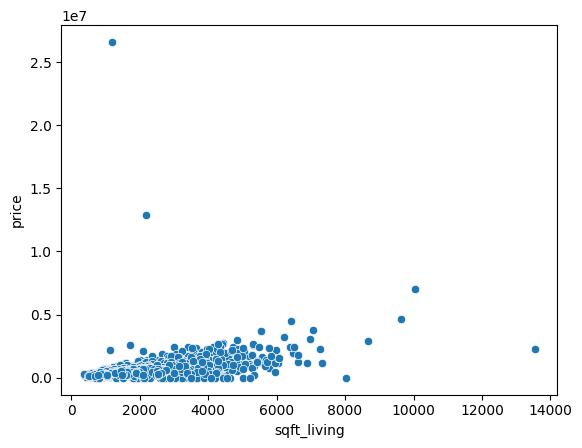

In [11]:
# price and  sqft 
sns.scatterplot(x='sqft_living', y='price', data=df) 
plt.show()

In [12]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,country
0,313000.0,3.0,1.50,1340,7912,1.5,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,USA
2,342000.0,3.0,2.00,1930,11947,1.0,USA
3,420000.0,3.0,2.25,2000,8030,1.0,USA
4,550000.0,4.0,2.50,1940,10500,1.0,USA


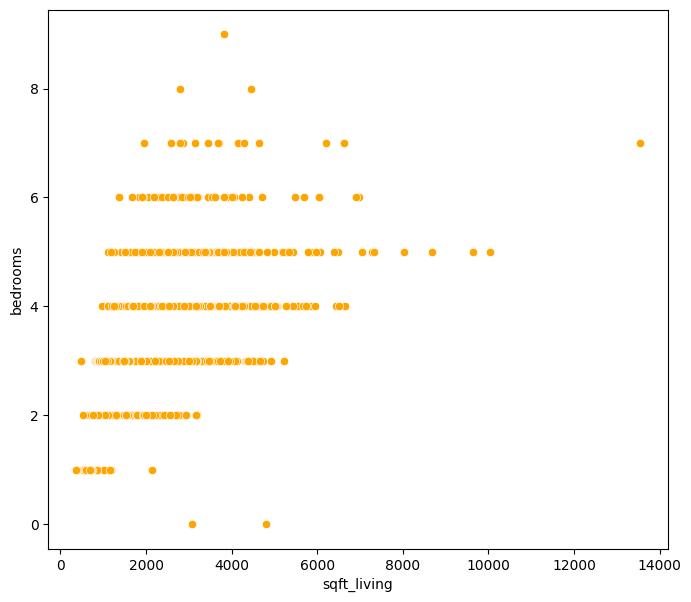

In [13]:
# bedroom and sqft_living 
plt.figure(figsize=(8,7))
sns.scatterplot(x='sqft_living',y='bedrooms', data=df ,color= 'orange')
plt.show()

In [14]:
df.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,country
0,313000.0,3.0,1.50,1340,7912,1.5,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,USA
2,342000.0,3.0,2.00,1930,11947,1.0,USA
3,420000.0,3.0,2.25,2000,8030,1.0,USA
4,550000.0,4.0,2.50,1940,10500,1.0,USA


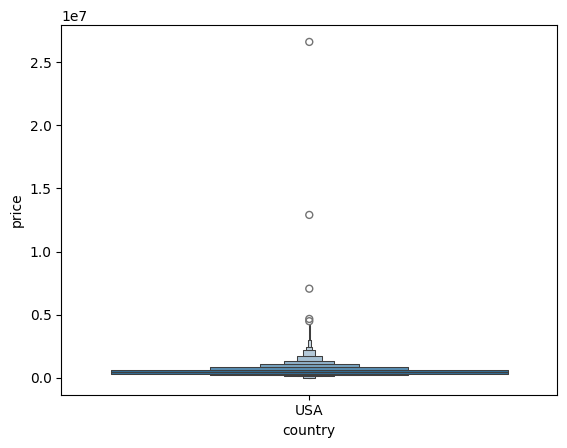

In [15]:
# Price by country
sns.boxenplot(x='country',y='price', data=df)
plt.show()

In [31]:
le = LabelEncoder()
df['country']= le.fit_transform(df['country'])

# Creating Model

In [32]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,country
0,313000.0,3.0,1.50,1340,7912,1.5,0
1,2384000.0,5.0,2.50,3650,9050,2.0,0
2,342000.0,3.0,2.00,1930,11947,1.0,0
3,420000.0,3.0,2.25,2000,8030,1.0,0
4,550000.0,4.0,2.50,1940,10500,1.0,0


In [33]:
X= df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','country']]
y= df['price']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [36]:
y_predict = model.predict(X_test)
print(y_predict)

[ 368343.04126261  399643.07431938  829522.07750892  584626.46412626
  434465.2447953   724897.63667221  504671.86576407  499727.10284796
  494603.91055251  503965.35202644  788814.81480276  274794.45019848
  844406.31353523  504764.26640845  412624.51571818  617886.27255372
  657116.7117278   553174.96718729  964394.13715593  961782.72316588
  775592.82527835  694595.52025752  641866.72525961  473179.38526962
  244892.53432425  220603.13412432  724813.68456231  827804.14057191
  388588.25446374  700683.56555223 1577264.06657607  351057.0705305
 1251899.64830818  495837.87541924  193090.24044113  436133.52266365
  893316.06996507  779533.52774824  288445.80190521  625430.11798386
  431052.06811719  373805.92844612  416629.55444984  411972.92403627
  301747.59284735  317184.62731806  502043.21586602  450030.35602485
  757889.22881939  324734.50644039 1176449.48256325  346808.1229427
  462069.1175594   692717.53733988  350917.65370847  374042.6712425
 1070675.37439996  631067.66835923 10

In [37]:
mean = r2_score(y_test, y_predict)
print('accuracy', mean)

accuracy 0.029183495254362923


# Deployment 

In [28]:
import joblib

In [29]:
joblib.dump(model, 'House_price_Prediction.pkl')

['House_price_Prediction.pkl']

In [30]:
joblib.dump(le, 'label_encoder.pkl')

['label_encoder.pkl']